In [1]:
from keras.datasets import reuters

(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)


C:\Users\clare\anaconda3\envs\python38\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\clare\anaconda3\envs\python38\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
word_index = reuters.get_word_index()
reversed_word_index = dict([(value, key)for(key, value) in word_index.items()])
decoded_newswire = ' '.join([reversed_word_index.get(i - 3, '?')for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [4]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, labels in enumerate(labels):
        results[i, labels] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
model.compile(optimizer='rmsprop',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [8]:
x_val = x_train[:1000]
parital_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [9]:
history = model.fit(parital_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
                    

Epoch 1/20
16/16 [==============================] - 0s 28ms/step - loss: 2.7920 - accuracy: 0.5150 - val_loss: 1.8326 - val_accuracy: 0.6380
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 1.4820 - accuracy: 0.6907 - val_loss: 1.3531 - val_accuracy: 0.7010
Epoch 3/20
16/16 [==============================] - 0s 13ms/step - loss: 1.0785 - accuracy: 0.7710 - val_loss: 1.1748 - val_accuracy: 0.7390
Epoch 4/20
16/16 [==============================] - 0s 13ms/step - loss: 0.8445 - accuracy: 0.8285 - val_loss: 1.0749 - val_accuracy: 0.7640
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6689 - accuracy: 0.8611 - val_loss: 0.9707 - val_accuracy: 0.8030
Epoch 6/20
16/16 [==============================] - 0s 13ms/step - loss: 0.5373 - accuracy: 0.8903 - val_loss: 0.9362 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 0s 13ms/step - loss: 0.4307 - accuracy: 0.9100 - val_loss: 0.9113 - val_accuracy: 0.8210
Epoch 8/20
16

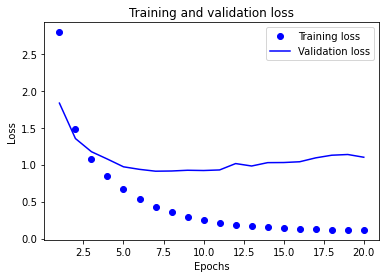

In [10]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

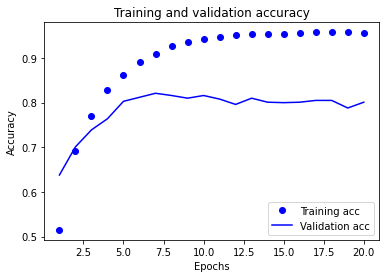

In [14]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [16]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

model.fit(parital_x_train,
            partial_y_train,
            epochs=9,
            batch_size=512,
            validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
results

Epoch 1/9
16/16 [==============================] - 0s 23ms/step - loss: 2.6841 - accuracy: 0.4361 - val_loss: 1.7891 - val_accuracy: 0.6380
Epoch 2/9
16/16 [==============================] - 0s 13ms/step - loss: 1.4481 - accuracy: 0.7046 - val_loss: 1.3338 - val_accuracy: 0.7150
Epoch 3/9
16/16 [==============================] - 0s 13ms/step - loss: 1.0690 - accuracy: 0.7732 - val_loss: 1.1697 - val_accuracy: 0.7420
Epoch 4/9
16/16 [==============================] - 0s 13ms/step - loss: 0.8466 - accuracy: 0.8183 - val_loss: 1.0738 - val_accuracy: 0.7560
Epoch 5/9
16/16 [==============================] - 0s 13ms/step - loss: 0.6769 - accuracy: 0.8530 - val_loss: 0.9867 - val_accuracy: 0.7960
Epoch 6/9
16/16 [==============================] - 0s 14ms/step - loss: 0.5453 - accuracy: 0.8851 - val_loss: 0.9531 - val_accuracy: 0.7970
Epoch 7/9
16/16 [==============================] - 0s 13ms/step - loss: 0.4360 - accuracy: 0.9087 - val_loss: 0.9140 - val_accuracy: 0.8090
Epoch 8/9
16/16 [===

[1.0094692707061768, 0.7867319583892822]